In [3]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

summary_path = Path("RangeBreakOut_USDJPY_trades_merged_summary.json")
with open(summary_path, "r", encoding="utf-8") as f:
    summary = json.load(f)

metrics = summary["metrics"]
cost_results = summary["cost_results"]
kelly = summary["kelly"]
vix_alignment = summary["vix_alignment"]
mc_results = summary["mc_results"]
gate_result = summary["gate_result"]


In [4]:
cost_df = pd.DataFrame.from_dict(cost_results, orient="index")
cost_df[["total_return", "max_drawdown"]] *= 100  # in %
display(cost_df[["total_return", "sharpe_ratio", "max_drawdown", "profit_factor"]])


,total_return,sharpe_ratio,max_drawdown,profit_factor
base,35.362020,2.787827,3.857260,1.722189
cost_plus_25,26.521515,2.787827,2.892945,1.722189
cost_plus_50,17.681010,2.787827,1.928630,1.722189


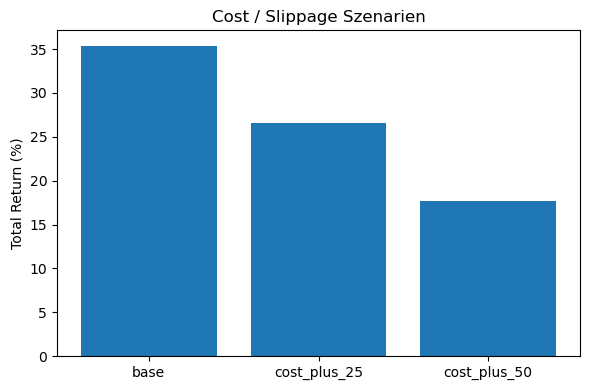

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(cost_df.index, cost_df["total_return"])
plt.ylabel("Total Return (%)")
plt.title("Cost / Slippage Szenarien")
plt.tight_layout()
plt.show()


,n_trades,total_return,sharpe_ratio,max_drawdown,profit_factor
High_Volatility,15.0,4.53329,4.282596,0.57222,3.356560
Low_Volatility,156.0,15.85373,2.794742,2.22397,1.759499
Range,161.0,13.36687,2.690673,2.42384,1.580600


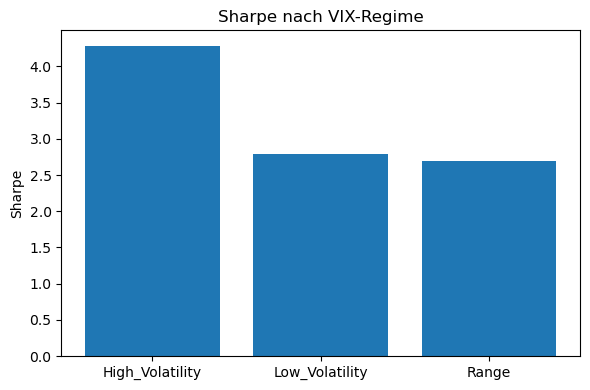

In [6]:
vix_stats = vix_alignment["regime_stats"]
vix_df = pd.DataFrame(vix_stats).T
vix_df[["total_return", "max_drawdown"]] *= 100

display(vix_df[["n_trades", "total_return", "sharpe_ratio", "max_drawdown", "profit_factor"]])

plt.figure(figsize=(6, 4))
plt.bar(vix_df.index, vix_df["sharpe_ratio"])
plt.ylabel("Sharpe")
plt.title("Sharpe nach VIX-Regime")
plt.tight_layout()
plt.show()


In [7]:
kelly_df = pd.DataFrame([kelly])
kelly_df[["win_rate", "kelly_full", "kelly_half", "kelly_quarter"]] *= 100
display(kelly_df[["win_rate", "payoff_ratio", "kelly_full", "kelly_half", "kelly_quarter"]])


,win_rate,payoff_ratio,kelly_full,kelly_half,kelly_quarter
0,51.129944,1.64607,21.441021,10.720511,5.360255
